## Neural Network


A neural network model is a computational model inspired by the structure and function of biological neural networks in the human brain. It consists of interconnected nodes, called neurons or units, organized into layers. The basic building block of a neural network is the perceptron, which takes multiple input values, each multiplied by a corresponding weight, and sums them up. This sum is then passed through an activation function to produce the output of the neuron.

In a neural network model, neurons are organized into layers: an input layer, one or more hidden layers, and an output layer. Each layer (except the input layer) typically has an associated activation function, which introduces non-linearity into the model. During training, the model adjusts the weights associated with each connection between neurons to minimize a loss function, thereby learning to make accurate predictions or classifications.

#### Importing libraries

In [6]:
import pandas as pd

#### Read the CSV file

In [7]:
nlp_data1=pd.read_csv('nlp_data1.csv')

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

#### Train & Test the data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

X = nlp_data1['lemmatized_token']
y = nlp_data1['target']

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Creating a Multilayer Perceptron (MLP) Classifier for Neural Network Modeling

In [15]:
neural_network =MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

#### Evaluating Multilayer Perceptron (MLP) Classifier Using Cross-Validation

In [16]:
cv_results_nn= cross_validate(neural_network, X_train, y_train, cv=5,
                              scoring=['accuracy','precision', 'recall', 'f1'])

#### Extracting Evaluation Metrics from Cross-Validation Results for MLP

In [19]:
accuracy_scores_nn = cv_results_nn['test_accuracy']
precision_scores_nn = cv_results_nn['test_precision']
recall_scores_nn= cv_results_nn['test_recall']
fl_scores_nn = cv_results_nn ['test_f1']


In [20]:
print("Accuracy: mean =", np.mean(accuracy_scores_nn), ", std =", np.std(accuracy_scores_nn))
print("Precision: mean =", np.mean(precision_scores_nn), ", std =", np.std(precision_scores_nn))
print("Recall: mean =", np.mean(recall_scores_nn), ", std =", np.std(recall_scores_nn))
print("F1 Score: mean =", np.mean(fl_scores_nn), ", std =", np.std(fl_scores_nn))

Accuracy: mean = 0.7559934318555007 , std = 0.013878848347530691
Precision: mean = 0.7316246182418128 , std = 0.024258395374513464
Recall: mean = 0.6857433660487096 , std = 0.01461960127070449
F1 Score: mean = 0.7076943104435374 , std = 0.014191747515138546


In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [25]:
neural_network.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [26]:
y_pred_nn = neural_network.predict(X_test)

#### Evaluating Confusion Matrix for Neural Network Classifier

In [27]:
confusion_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix for Neural Network:")
print(confusion_matrix_nn)

Confusion Matrix for Neural Network:
[[715 159]
 [215 434]]


#### Visualizing Confusion Matrix for Neural Network Classifier

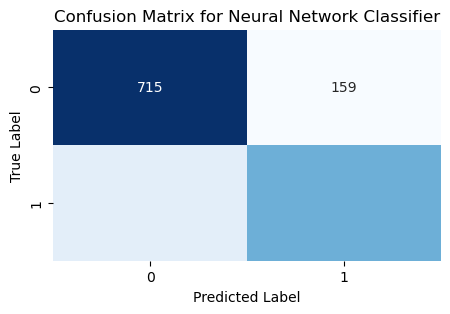

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming confusion_matrix_nn is the confusion matrix obtained
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Neural Network Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix for the neural network classifier reveals insightful performance metrics. With 715 true positives and 434 true negatives, the model correctly predicts these instances. However, it misclassifies 159 instances as false positives and 215 instances as false negatives. This indicates areas for potential improvement, particularly in reducing false positives and false negatives to enhance the model's accuracy and reliability. Further analysis and optimization strategies can be employed to address these misclassifications and refine the neural network classifier's performance for practical deployment.